In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [45]:
%pip install xgboost
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [47]:
df = pd.read_csv('data/Employment_dataset.csv')

In [49]:
df.head()

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,Extracurricular_Activities,Placement_Training,SSC_Marks,HSC_Marks,Employment_Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [50]:
df.head()

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,Extracurricular_Activities,Placement_Training,SSC_Marks,HSC_Marks,Employment_Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [51]:
X = df.drop(columns=['Employment_Status'],axis=1)

In [52]:
X.head()

,CGPA,Internships,Projects,Certifications,Aptitude_Test_ Score,Soft_ Skills_Rating,Extracurricular_Activities,Placement_Training,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,No,No,61,79
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82
2,7.3,1,2,2,82,4.8,Yes,No,79,80
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88


In [53]:
y = df['Employment_Status'] 

In [54]:
y.head()

0    NotPlaced
1       Placed
2    NotPlaced
3       Placed
4       Placed
Name: Employment_Status, dtype: object

In [55]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [56]:
X = preprocessor.fit_transform(X)

In [57]:
X.shape

(10000, 12)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Employment_Status'])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [61]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc, prec, rec, f1

In [62]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=False),
    "AdaBoost": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_acc, train_prec, train_rec, train_f1 = evaluate_model(y_train, y_train_pred)
    test_acc, test_prec, test_rec, test_f1 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"{name}")
    model_list.append(name)
    
    print("Model performance on Training set")
    print(f"- Accuracy: {train_acc:.4f}")
    print(f"- Precision: {train_prec:.4f}")
    print(f"- Recall: {train_rec:.4f}")
    print(f"- F1 Score: {train_f1:.4f}")

    print("----------------------------------")

    print("Model performance on Test set")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- Precision: {test_prec:.4f}")
    print(f"- Recall: {test_rec:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    
    accuracy_list.append(test_acc)

    print("="*35)
    print()

Logistic Regression
Model performance on Training set
- Accuracy: 0.8000
- Precision: 0.7616
- Recall: 0.7643
- F1 Score: 0.7630
----------------------------------
Model performance on Test set
- Accuracy: 0.7945
- Precision: 0.7444
- Recall: 0.7669
- F1 Score: 0.7555

Support Vector Classifier
Model performance on Training set
- Accuracy: 0.8107
- Precision: 0.7876
- Recall: 0.7539
- F1 Score: 0.7704
----------------------------------
Model performance on Test set
- Accuracy: 0.7945
- Precision: 0.7552
- Recall: 0.7452
- F1 Score: 0.7502

Naive Bayes
Model performance on Training set
- Accuracy: 0.7917
- Precision: 0.7301
- Recall: 0.8020
- F1 Score: 0.7644
----------------------------------
Model performance on Test set
- Accuracy: 0.7905
- Precision: 0.7192
- Recall: 0.8104
- F1 Score: 0.7621

K-Nearest Neighbors
Model performance on Training set
- Accuracy: 0.8345
- Precision: 0.8111
- Recall: 0.7913
- F1 Score: 0.8011
----------------------------------
Model performance on Test se

In [63]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("Accuracy of the model is %.2f" % accuracy)
print("Precision: %.2f" % precision)
print("Recall: %.2f" % recall)
print("F1 Score: %.2f" % f1)

Accuracy of the model is 79.45
Precision: 74.44
Recall: 76.69
F1 Score: 75.55


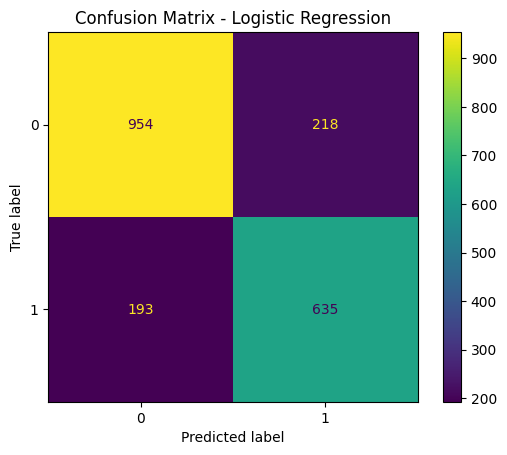

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

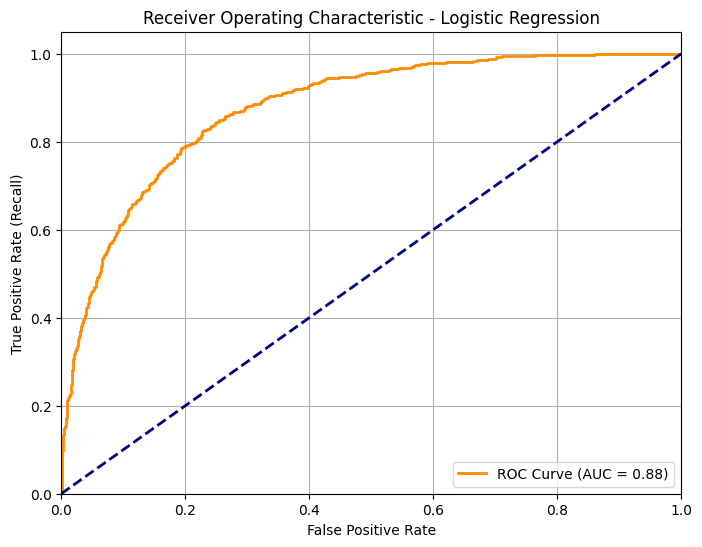

In [65]:
from sklearn.metrics import roc_curve, auc

y_prob = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()